
<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 3 </H3>
<hr style="height:2px;border:none"/>



# Temas

* Modelos No-Lineales: SVMs, Árboles, KNN, ANN, Ensamblados. 


# Instrucciones

Considerando el cierre de semestre, esta última tarea consistirá sólo en un desafío Kaggle. Para emparejar el estándar de las soluciones entregadas se solicitará explícitamente abordar una serie de puntos que siempre debiese incluir el diseño y análisis de la solución.



*   Análisis exploratorio de datos y detección de situaciones anómalas en los datos.
*   Diseño de una técnica razonada de imputación para manejo de datos faltantes.
*   Elección de una metodología para estimar el error de predicción del modelo.
*   Análisis de la calidad de la solución para la métrica estudiada.
*   Ranking de las variables más importantes.


Adicionalmente, para asegurar la cobertura de los temas nuevos se solicita

*   Evaluación de al menos 2 modelos no-lineales diferentes, de los cuáles 1 debe ser ensamblado 
*   Elección/recomendación razonada de uno de los dos modelos anteriores.

# **Desafío Kaggle** 

El desafío consistirá en crear un modelo que use datos de las primeras 24 horas de cuidados intensivos que permita predecir la supervivencia de un paciente. La iniciativa comunitaria GOSSIS del MIT, con certificación de privacidad del Laboratorio Harvard Privacy, ha proporcionado un conjunto de datos de visitas de pacientes a la Unidad de Cuidados Intensivos (UCI) del hospital, durante un período de un año. Estos datos son parte de un esfuerzo global creciente y un consorcio que abarca Argentina, Australia, Nueva Zelanda, Sri Lanka, Brasil y más de 200 hospitales en los Estados Unidos.


https://www.kaggle.com/t/691221f5022dd2de93bbda184fceaecf


## Para acordarme:
* Nueva feature -> rango etario en base a la edad (categorico)
* Nueva feature -> agregar en algún valor entre 0 y 1 las columnas d1 y h1, es decir, que hayan 2 nuevas features, que podrían ser como d1_score y h1_score que varíen su valor entre 0 y 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')


In [3]:
df_train = pd.read_csv('data/df_train.csv')
df_train

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,98554,3413,60,0,NaN,28.357077,0,Asian,NaN,154.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,70232,19980,139,0,NaN,24.547793,1,African American,NaN,154.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
2,24701,54659,39,0,NaN,24.284760,1,Caucasian,NaN,172.70,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses
3,68593,8469,176,0,NaN,35.045481,0,Caucasian,NaN,144.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
4,103103,124128,182,0,NaN,19.010652,0,Caucasian,NaN,180.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89708,52840,14469,188,0,NaN,14.844926,0,Caucasian,NaN,170.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
89709,107834,123189,19,1,63.0,25.148009,0,Caucasian,M,177.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
89710,125869,107796,21,0,NaN,25.369438,1,Caucasian,NaN,177.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
89711,115795,105886,10,0,NaN,31.703948,1,African American,NaN,185.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Musculoskeletal/Skin,Undefined diagnoses


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89713 entries, 0 to 89712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 127.3+ MB


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,89713.0,65614.688373,37799.018913,1.0,32855.0,65692.0,98372.0,131051.0
patient_id,89713.0,65525.210337,37811.139772,1.0,32828.0,65396.0,98277.0,131051.0
hospital_id,89713.0,105.696187,62.834468,2.0,47.0,109.0,161.0,204.0
hospital_death,89713.0,0.077079,0.266718,0.0,0.0,0.0,0.0,1.0
age,7146.0,67.813742,14.801458,16.0,59.0,70.0,79.0,89.0
...,...,...,...,...,...,...,...,...
hepatic_failure,89017.0,0.012885,0.112780,0.0,0.0,0.0,0.0,1.0
immunosuppression,89017.0,0.026006,0.159155,0.0,0.0,0.0,0.0,1.0
leukemia,89017.0,0.006976,0.083232,0.0,0.0,0.0,0.0,1.0
lymphoma,89017.0,0.004100,0.063903,0.0,0.0,0.0,0.0,1.0


In [6]:
df_train.dtypes.value_counts()

float64    170
int64        8
object       8
dtype: int64

In [7]:
df_train.nunique().sort_values().head(40)

readmission_status              1
aids                            2
hepatic_failure                 2
gcs_unable_apache               2
immunosuppression               2
arf_apache                      2
cirrhosis                       2
leukemia                        2
gender                          2
elective_surgery                2
lymphoma                        2
intubated_apache                2
hospital_death                  2
ventilated_apache               2
solid_tumor_with_metastasis     2
apache_post_operative           2
diabetes_mellitus               2
icu_stay_type                   3
gcs_eyes_apache                 4
gcs_verbal_apache               5
icu_admit_source                5
gcs_motor_apache                6
ethnicity                       6
icu_type                        8
apache_2_bodysystem            10
apache_3j_bodysystem           11
hospital_admit_source          15
d1_albumin_min                 35
albumin_apache                 35
d1_albumin_max

Notemos que es un problema desbalanceado

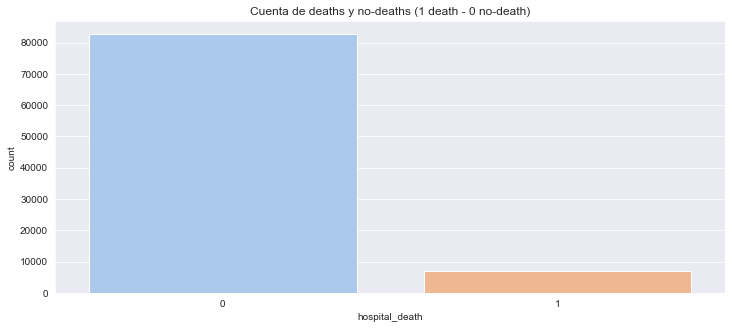

0    82798
1     6915
Name: hospital_death, dtype: int64

In [8]:
fig, ax = plt.subplots(figsize=(12,5),nrows=1)
sns.countplot(x="hospital_death", data=df_train, palette="pastel", ax = ax)
ax.set_title('Cuenta de deaths y no-deaths (1 death - 0 no-death)')
plt.show()

df_train['hospital_death'].value_counts()


In [9]:
# revisar cuantos datos faltan por columna
print("Número de datos NaN por feature Test: \n")
print(df_train.isnull().sum(axis = 0).sort_values(ascending=False).head())

Número de datos NaN por feature Test: 

h1_bilirubin_min    82813
h1_bilirubin_max    82813
h1_lactate_min      82615
h1_lactate_max      82615
age                 82567
dtype: int64


In [64]:
df_train.duplicated().sum()

0

Observemos como se distribuyen las columnas categóricas en las personas sobrevivientes y en las que no

In [10]:
categorical_columns = list(df_train.select_dtypes(exclude=[np.number]).columns)
categorical_columns

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [11]:
# ademas consideremos las variables enteras que tienen pocos valores, ya que se definen como categóricas de igual forma
print(df_train.nunique().sort_values().head(27))

categorical_columns = list(set(categorical_columns + list(df_train.nunique().sort_values().head(27).index.values)))
categorical_columns

readmission_status              1
aids                            2
hepatic_failure                 2
gcs_unable_apache               2
immunosuppression               2
arf_apache                      2
cirrhosis                       2
leukemia                        2
gender                          2
elective_surgery                2
lymphoma                        2
intubated_apache                2
hospital_death                  2
ventilated_apache               2
solid_tumor_with_metastasis     2
apache_post_operative           2
diabetes_mellitus               2
icu_stay_type                   3
gcs_eyes_apache                 4
gcs_verbal_apache               5
icu_admit_source                5
gcs_motor_apache                6
ethnicity                       6
icu_type                        8
apache_2_bodysystem            10
apache_3j_bodysystem           11
hospital_admit_source          15
dtype: int64


['icu_stay_type',
 'hospital_death',
 'apache_post_operative',
 'ethnicity',
 'leukemia',
 'readmission_status',
 'apache_3j_bodysystem',
 'gcs_eyes_apache',
 'lymphoma',
 'aids',
 'gcs_unable_apache',
 'icu_admit_source',
 'ventilated_apache',
 'gcs_motor_apache',
 'hepatic_failure',
 'diabetes_mellitus',
 'solid_tumor_with_metastasis',
 'intubated_apache',
 'gender',
 'elective_surgery',
 'icu_type',
 'hospital_admit_source',
 'gcs_verbal_apache',
 'cirrhosis',
 'apache_2_bodysystem',
 'immunosuppression',
 'arf_apache']

In [12]:
df_train[categorical_columns].isnull().sum(axis = 0).sort_values()

icu_stay_type                      0
hospital_death                     0
apache_post_operative              0
icu_type                           0
readmission_status                 0
elective_surgery                   0
icu_admit_source                 112
cirrhosis                        696
intubated_apache                 696
solid_tumor_with_metastasis      696
diabetes_mellitus                696
hepatic_failure                  696
immunosuppression                696
arf_apache                       696
aids                             696
lymphoma                         696
leukemia                         696
ventilated_apache                696
gcs_unable_apache               1010
ethnicity                       1370
apache_3j_bodysystem            1625
apache_2_bodysystem             1625
gcs_eyes_apache                 1850
gcs_verbal_apache               1850
gcs_motor_apache                1850
hospital_admit_source          20975
gender                         81979
d

In [13]:
df_train[categorical_columns].nunique().sort_values()

readmission_status              1
arf_apache                      2
hepatic_failure                 2
immunosuppression               2
ventilated_apache               2
intubated_apache                2
gcs_unable_apache               2
aids                            2
lymphoma                        2
gender                          2
elective_surgery                2
leukemia                        2
cirrhosis                       2
apache_post_operative           2
hospital_death                  2
diabetes_mellitus               2
solid_tumor_with_metastasis     2
icu_stay_type                   3
gcs_eyes_apache                 4
gcs_verbal_apache               5
icu_admit_source                5
ethnicity                       6
gcs_motor_apache                6
icu_type                        8
apache_2_bodysystem            10
apache_3j_bodysystem           11
hospital_admit_source          15
dtype: int64

In [65]:
binary_features = df_train[categorical_columns].nunique()[df_train[categorical_columns].nunique() == 2]
binary_features = list(binary_features.index)
binary_features

['hospital_death',
 'apache_post_operative',
 'leukemia',
 'lymphoma',
 'aids',
 'gcs_unable_apache',
 'ventilated_apache',
 'hepatic_failure',
 'diabetes_mellitus',
 'solid_tumor_with_metastasis',
 'intubated_apache',
 'gender',
 'elective_surgery',
 'cirrhosis',
 'immunosuppression',
 'arf_apache']

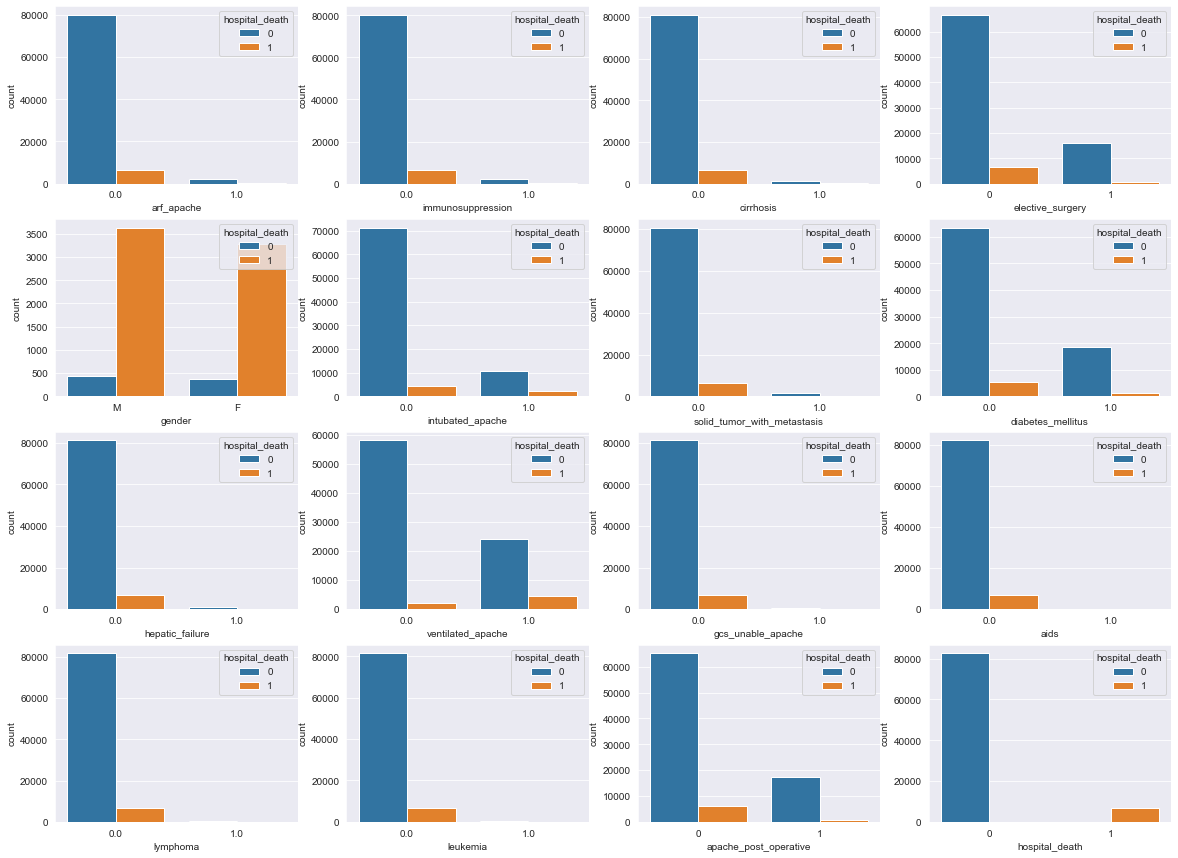

In [66]:
# plotearemos todas las features binarias (y categóricas)
figure, ax = plt.subplots(4, 4,  figsize=(20, 15))

for i in range(4):
    for j in range(4):
        column = binary_features.pop()
        sns.countplot(data=df_train, 
                  x=column, 
                  hue="hospital_death",
                  order = df_train[column].value_counts().index,
                  ax=ax[i,j])
plt.show()                   

De lo anterior, podemos comentar lo siguiente
* Notemos que existen muchas variables en donde no existe mayor relevancia que el paciente tenga cierta enfermedad o no. Por ejemplo, en las columnas arf_apache, immunosuppression, cirrhosis, solid_tumor_with_metastasis, hepatic_failure, gcs_unable_apache, aids, lymphoma, y leukemia no tienen registros de personas fallecidas que hayan tenido estas enfermedades
* Al observar la columna gender, notamos que no hay mayor diferencia entre hombres y mujeres en cuanto a la cantidad de fallecidos. También, notemos que existen muchos datos faltantes en el género y que la mayoría de los registros que no son nulos, son de personas fallecidas.

Ahora observermos como se comportan las variables categóricas no binarias

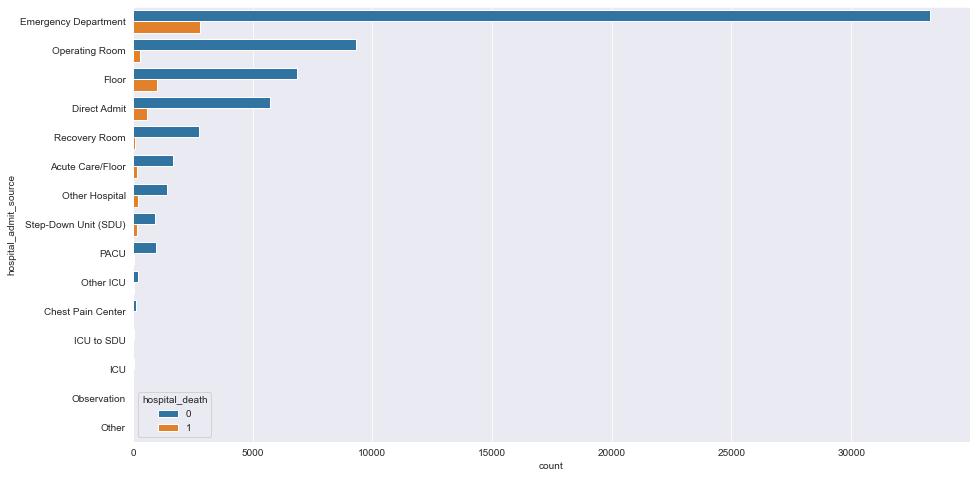

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,
              y="hospital_admit_source", 
              hue="hospital_death",
             order = df_train['hospital_admit_source'].value_counts().index)
plt.show()

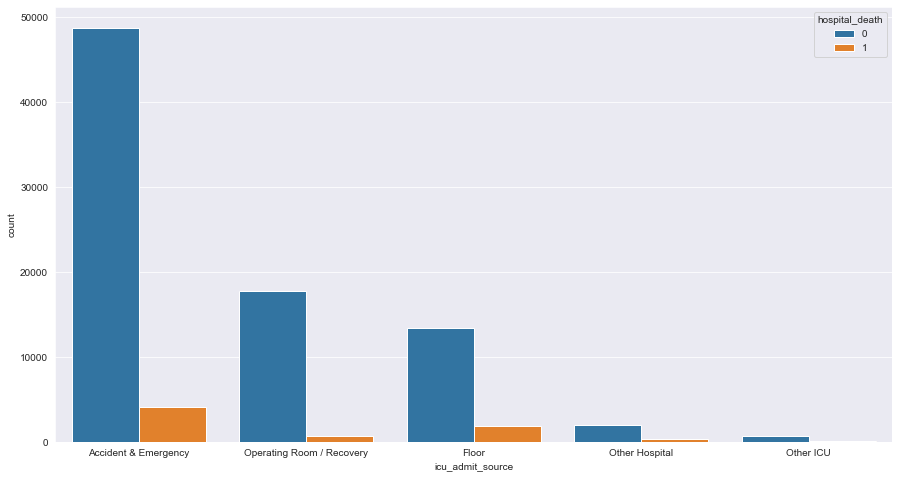

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,
              x="icu_admit_source", 
              hue="hospital_death",
             order = df_train['icu_admit_source'].value_counts().index)
plt.show()

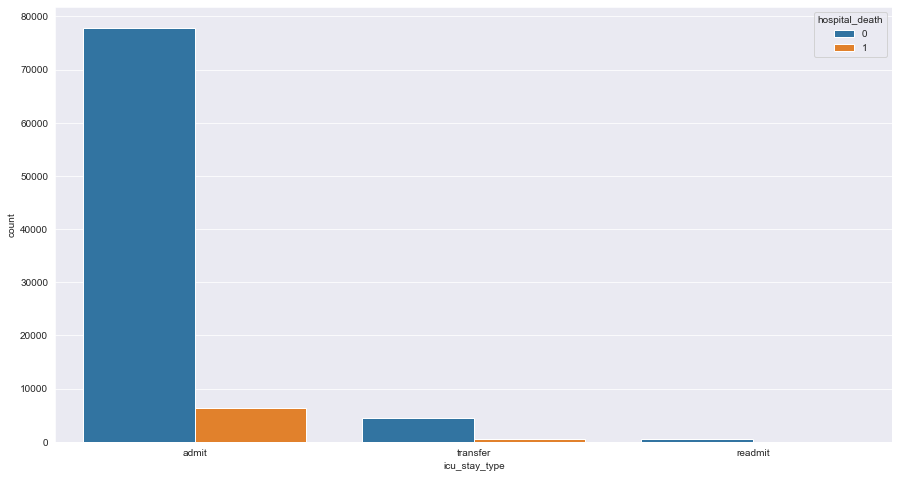

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,
              x="icu_stay_type", 
              hue="hospital_death",
             order = df_train['icu_stay_type'].value_counts().index)
plt.show()

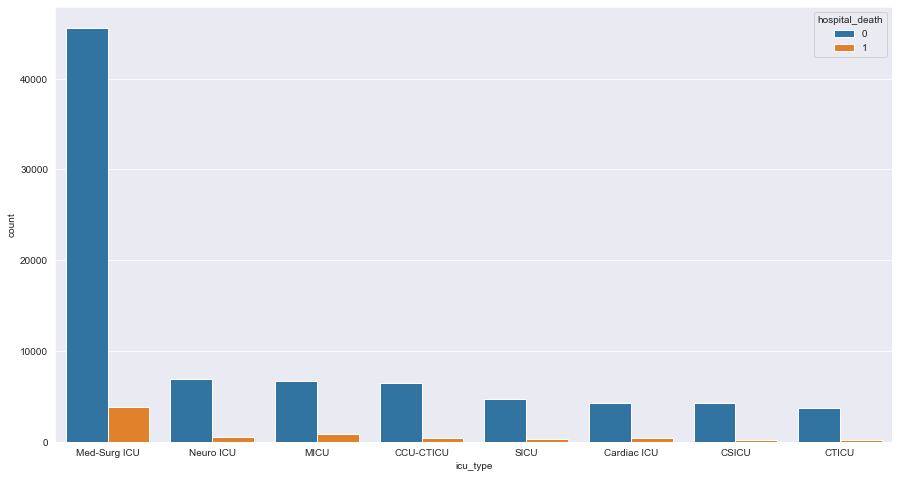

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,
              x="icu_type", 
              hue="hospital_death",
             order = df_train['icu_type'].value_counts().index)
plt.show()

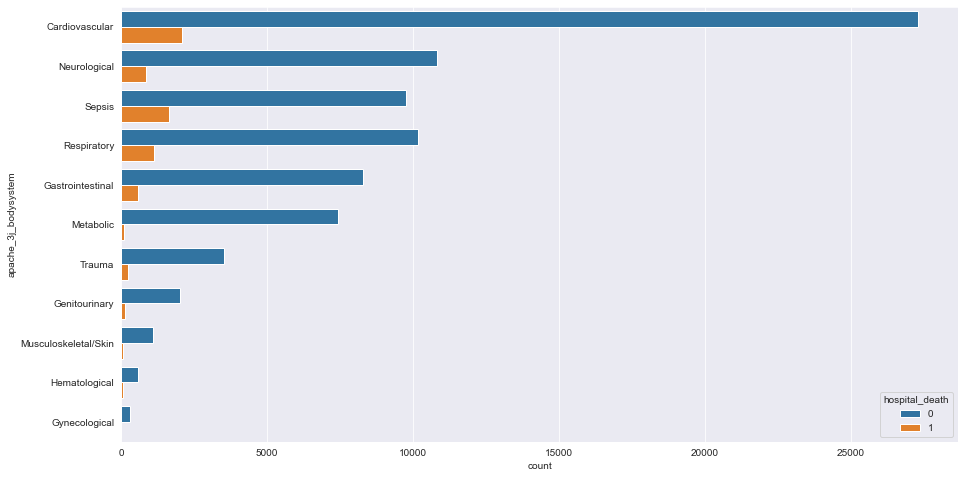

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,
              y="apache_3j_bodysystem", 
              hue="hospital_death",
             order = df_train['apache_3j_bodysystem'].value_counts().index)
plt.show()

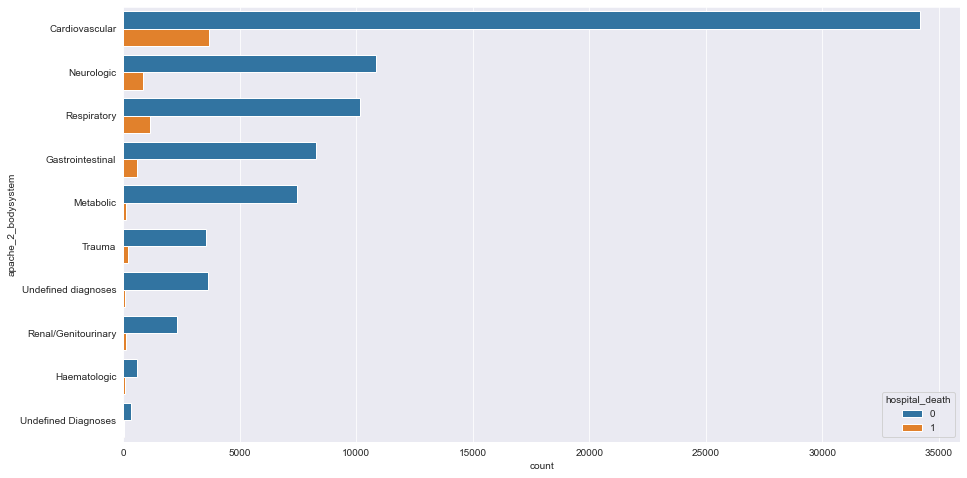

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,
              y="apache_2_bodysystem", 
              hue="hospital_death",
             order = df_train['apache_2_bodysystem'].value_counts().index)
plt.show()

Ahora veamos como se comportan las columnas numéricas

In [32]:
int_columns = list(df_train.select_dtypes(include=[np.int]).columns)
float_columns = list(df_train.select_dtypes(include=[np.float]).columns)

In [33]:
# notemos que acá no existen valores nulos
df_train[int_columns].isnull().sum(axis = 0).sort_values()

encounter_id             0
patient_id               0
hospital_id              0
hospital_death           0
elective_surgery         0
icu_id                   0
readmission_status       0
apache_post_operative    0
dtype: int64

In [34]:
# acá hay muchos valores nulos y que podrían ser considerados importantes para la predicción, ej, la edad
# una persona de edad más avanzada tiende a estar más delicado de salud
df_train[float_columns].isnull().sum(axis = 0).sort_values()

pre_icu_los_days        0
d1_heartrate_max      139
d1_heartrate_min      139
d1_sysbp_min          151
d1_sysbp_max          151
                    ...  
age                 82567
h1_lactate_max      82615
h1_lactate_min      82615
h1_bilirubin_min    82813
h1_bilirubin_max    82813
Length: 170, dtype: int64

Veamos con un gráfico de barras cuáles son las variables continuas que tienen más datos nulos, ya que debemos ver como imputarles valores a estas columnas o simplemente eliminarlas si es que son muchos los datos nulos que existen

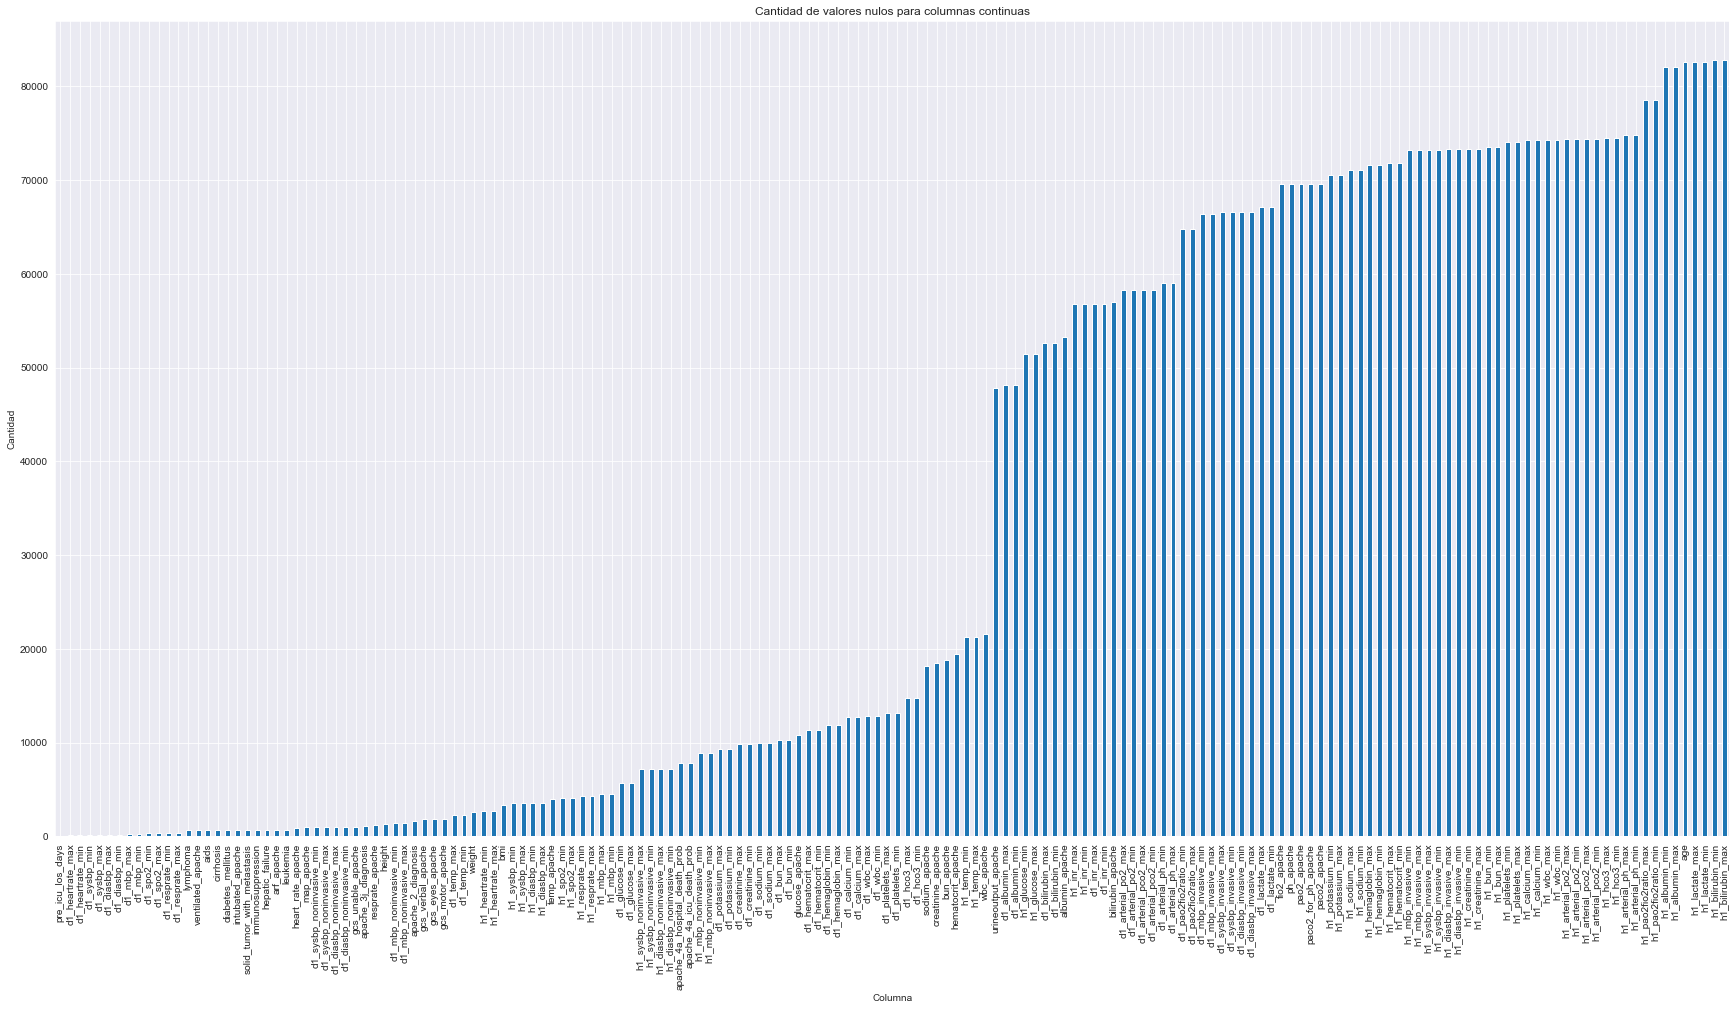

In [86]:
fig, ax = plt.subplots(figsize=(30,15),nrows=1)
df_train[float_columns].isnull().sum(axis = 0).sort_values().plot.bar()
plt.title("Cantidad de valores nulos para columnas continuas")
plt.xlabel("Columna")
plt.ylabel("Cantidad")
plt.show()

h1_bilirubin_max    92.308807
h1_bilirubin_min    92.308807
h1_lactate_max      92.088103
h1_lactate_min      92.088103
age                 92.034599
                      ...    
d1_sysbp_min         0.168315
d1_sysbp_max         0.168315
d1_heartrate_max     0.154939
d1_heartrate_min     0.154939
pre_icu_los_days     0.000000
Length: 170, dtype: float64


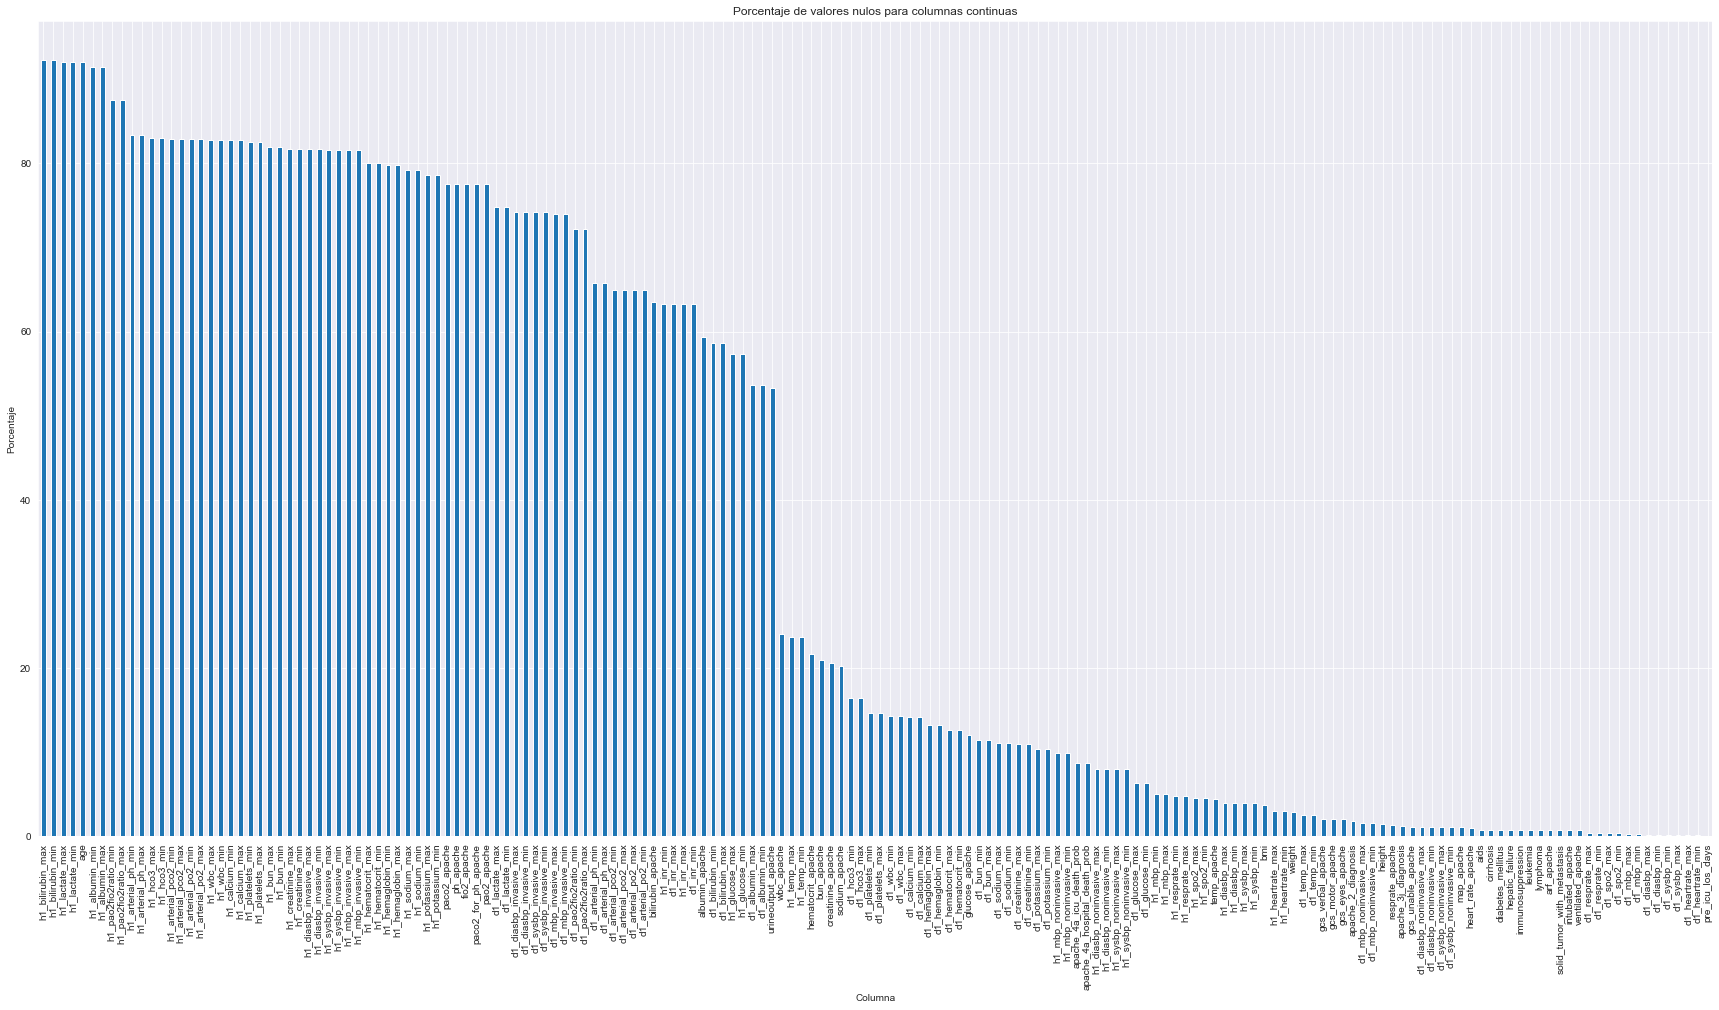

In [87]:
#veamos por porcentaje
percent_missing_floats = df_train[float_columns].isnull().sum() * 100 / len(df_train[float_columns])
percent_missing_floats = percent_missing_floats.sort_values(ascending=False)

print(percent_missing_floats)
fig, ax = plt.subplots(figsize=(30,15),nrows=1)
plt.title("Porcentaje de valores nulos para columnas continuas")
plt.xlabel("Columna")
plt.ylabel("Porcentaje")
percent_missing_floats.plot.bar()
plt.show()

Realicemos el gráfico de todas las variables continuas para observar su distribución (análisis univariado)

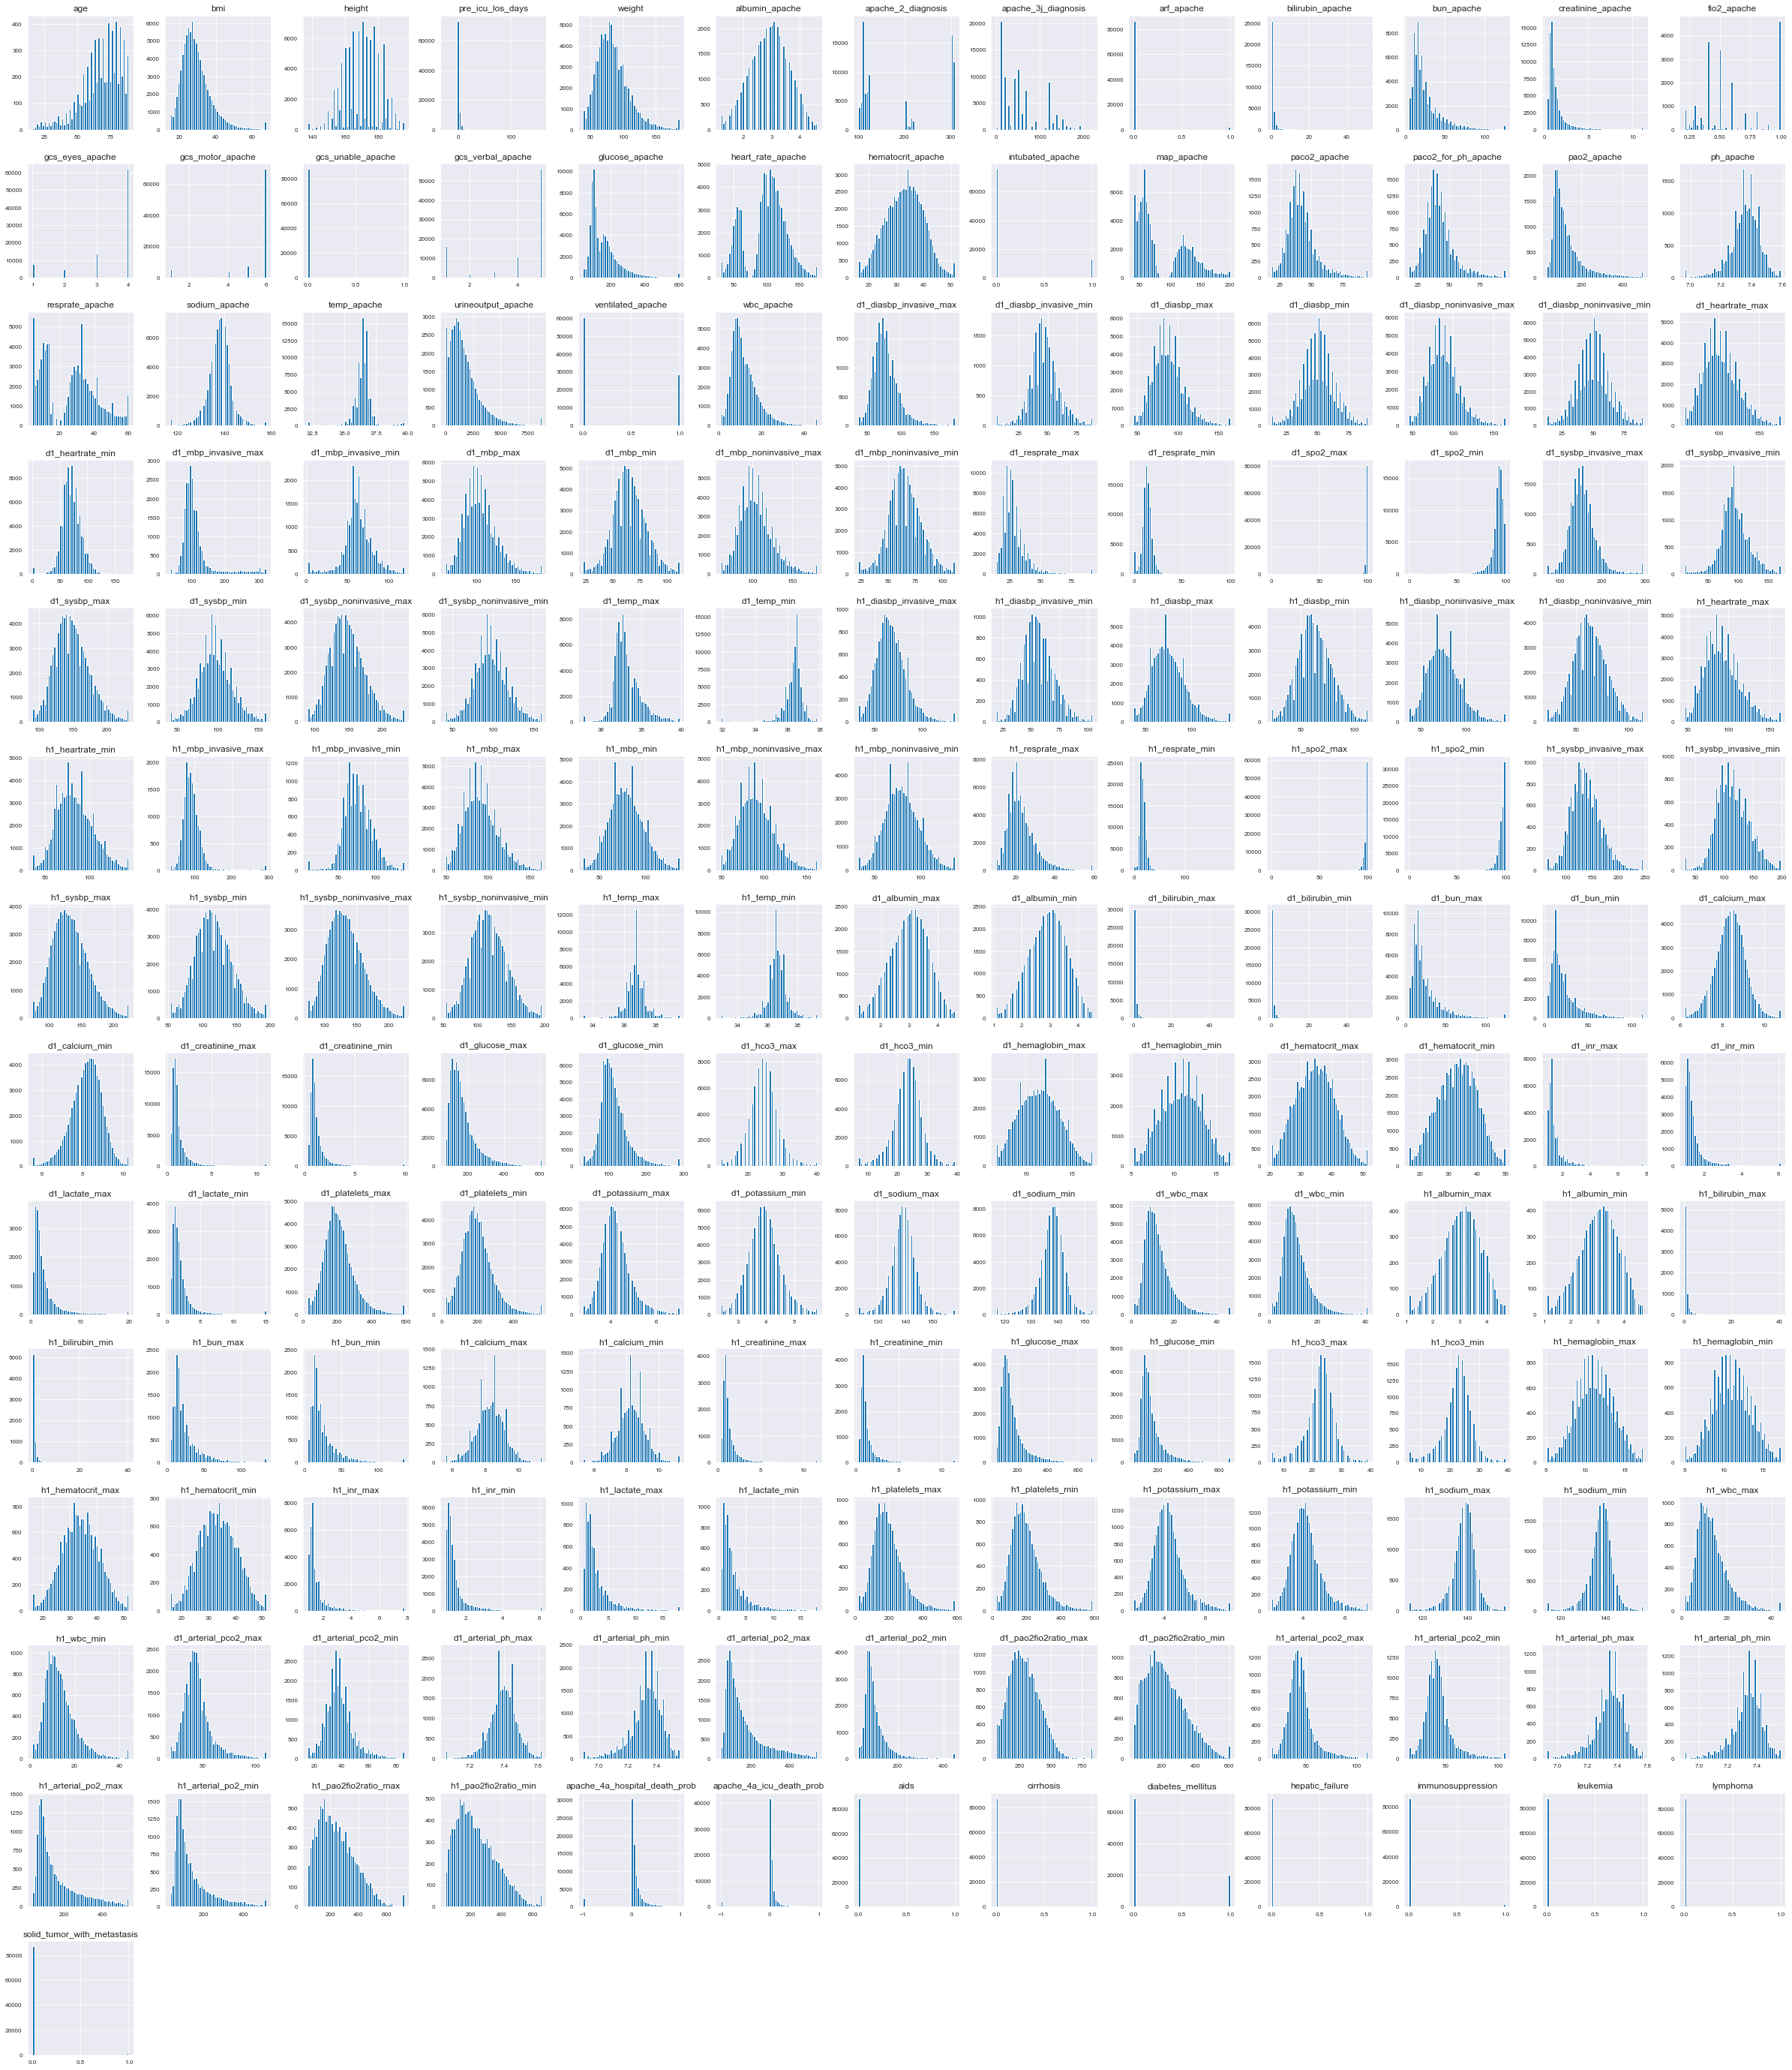

In [70]:
df_train[float_columns].hist(figsize=(42, 50), bins=50, xlabelsize=8, ylabelsize=8);

De lo anterior podemos obtener lo siguiente:
* La mayoría de las variables se distribuyen normalmente, en específico en las que en su nombre llevan _d1_ y _h1_. Algunas de estas distribuciones tienen sesgo a la izquierda o derecha.

* Al observar que existen varios atributos que tienen comportamiento normal, podemos optar con mayor seguridad la imputación de atributos nulos con métodos simples

* Existen algunas variables que tienen distribuciones más complejas (bimodales y multimodales), como por ejemplo resprate_apache, apache_2_diagnosis, map_apache, heart_rate_apache y varias más. Para estas variables se deberá estudiar bien qué métodos de implantación de datos nulos utilizar o simplemente eliminar por completo estos atributos

Veamos por ejemplo el atributo de Edad. Esta feature podría ser de mucha importancia, debido a que las personas de alta edad tienen mayores probabilidades de no sobrevivir y por lo general tienen peor salud que la gente más joven

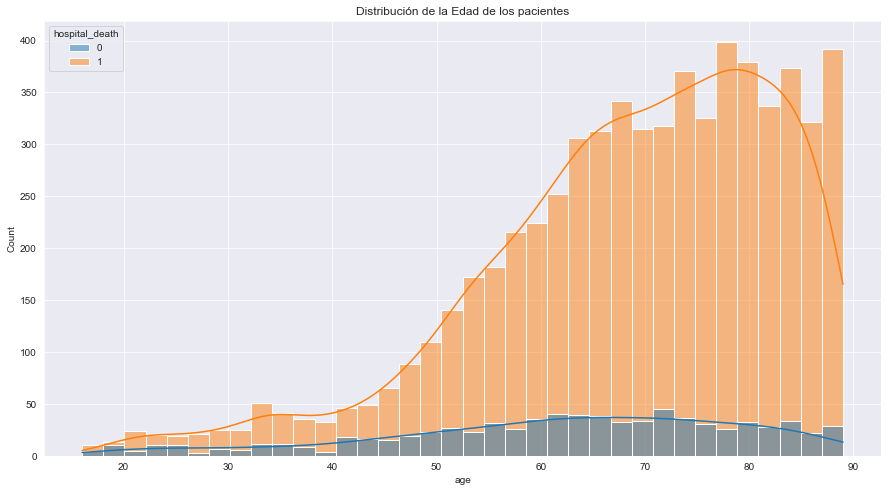

In [97]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_train, x='age', hue='hospital_death', kde=True)
plt.title('Distribución de la Edad de los pacientes')
plt.show()

In [136]:
percent_null_age_deaths = df_train[df_train["hospital_death"]==1]["age"].isnull().sum()/len(df_train)
print(f'Porcentaje de edades nulas en gente que NO sobrevivió {df_train[df_train["hospital_death"]==1]["age"].isnull().sum()}/{len(df_train)} = {percent_null_age_deaths*100}%')

Porcentaje de edades nulas en gente que NO sobrevivió 561/89713 = 0.6253274330364607%


In [137]:
percent_notnull_age_deaths = df_train[df_train["hospital_death"]==0]["age"].isnull().sum()/len(df_train)
print(f'Porcentaje de edades nulas en gente que SI sobrevivió {df_train[df_train["hospital_death"]==0]["age"].isnull().sum()}/{len(df_train)} = {percent_notnull_age_deaths*100}%')

Porcentaje de edades nulas en gente que SI sobrevivió 82006/89713 = 91.40927178892692%


Entonces por lo anterior, podemos concluir que existe una gran cantidad de datos nulos para la gente que si sobrevive, no así para los que no sobreviven, por lo que se puede inferir que en las personas que no sobreviven en el hospital, por lo general tendrán su edad disponible en los datos. Esto probablemente es porque cuando la persona fallece se le deben realizar ciertos procesos estándares de identidad, y esto incluye tomar la edad de la persona. Investigaremos más a fondo ahora las distribuciones de los datos de los pacientes que no sobrevivieron

In [232]:
# funcion que genera boxplot y violin plot para 2 columnas dadas (x e y) 
# se dejará por mientras la segunda columna como hospital death
def plot_boxplot_violin(df, col1, col2='hospital_death'):
    plt.figure(figsize=(15,8))
    sns.boxplot(data=df, x=col1, y=col2, orient='h')
    plt.title(f'{col1} vs {col2} Boxplots')
    plt.show()

    plt.figure(figsize=(15,8))
    sns.violinplot(data=df, x=col1, y=col2, orient='h')
    plt.title(f'{col1} vs {col2} Violinplot')
    plt.show()
    
    print('-'*122)

Realizaremos comparación de varias variables numéricas vs la variable objetivo hospital_death

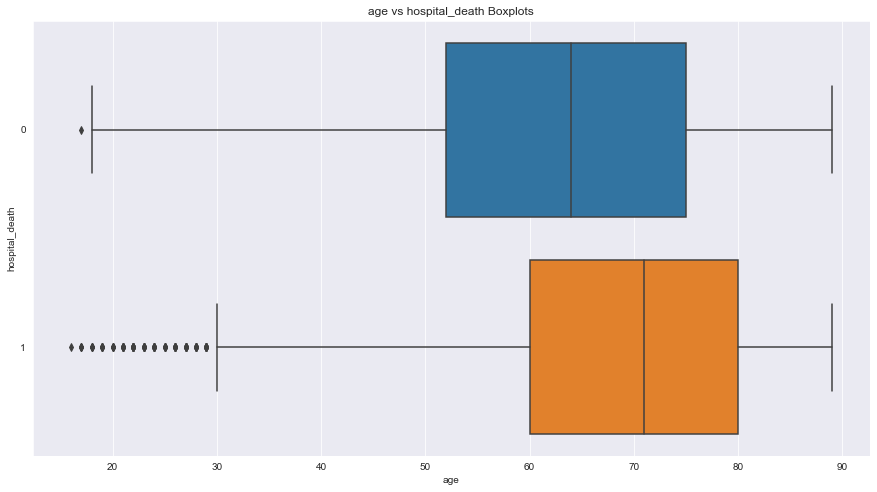

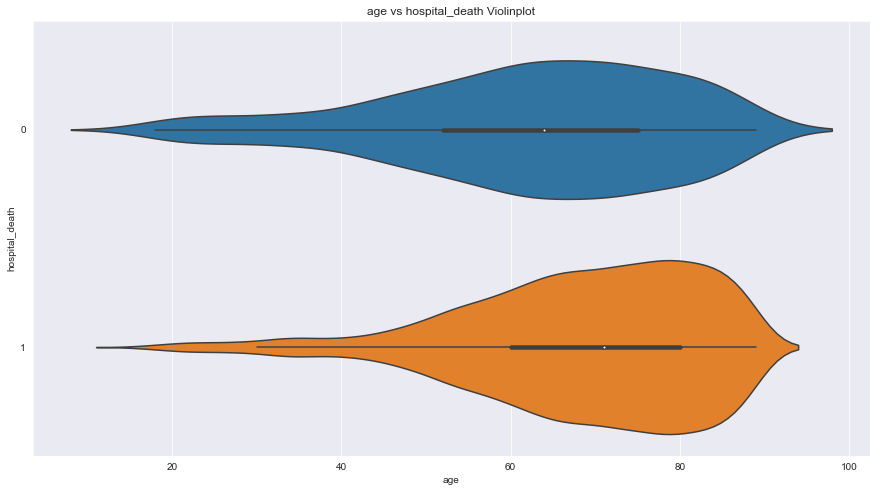

--------------------------------------------------------------------------------------------------------------------------


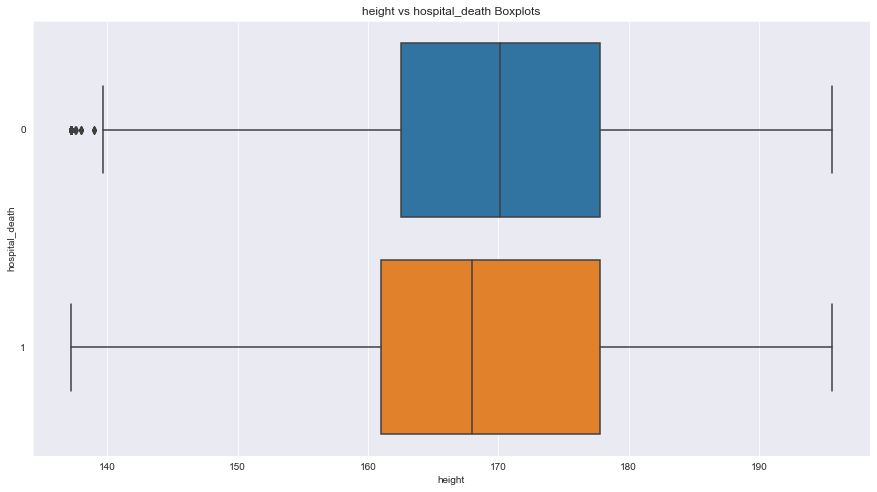

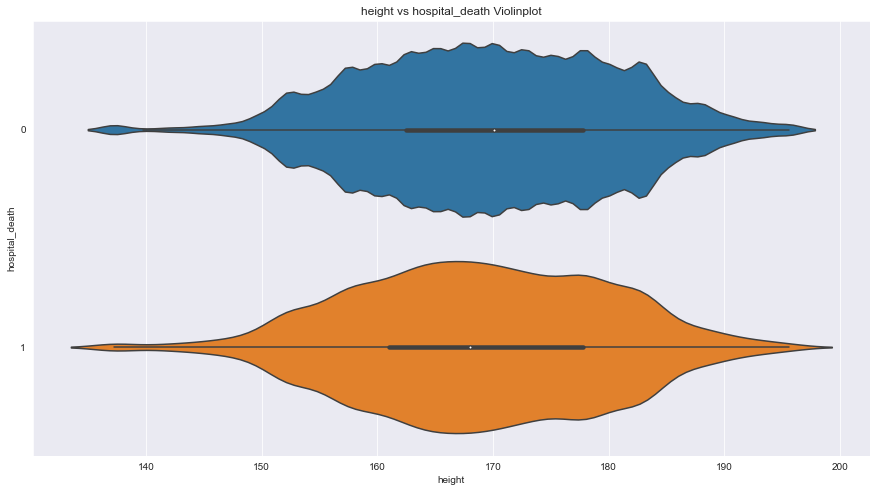

--------------------------------------------------------------------------------------------------------------------------


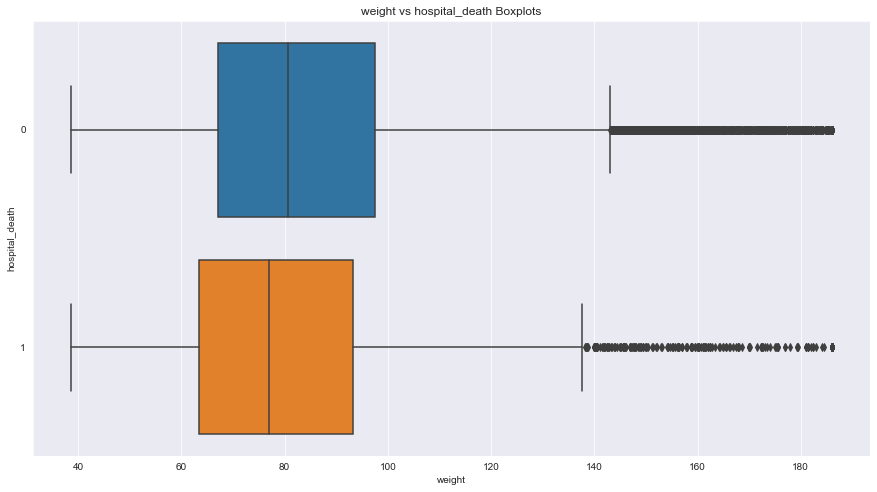

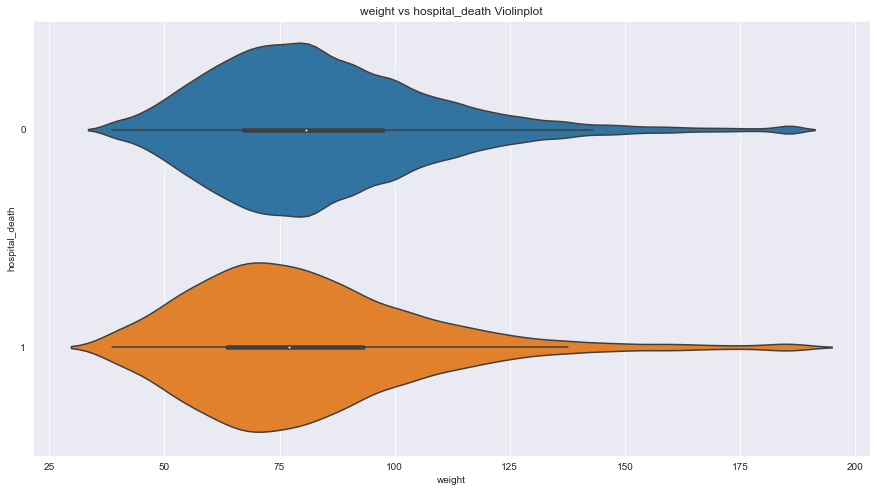

--------------------------------------------------------------------------------------------------------------------------


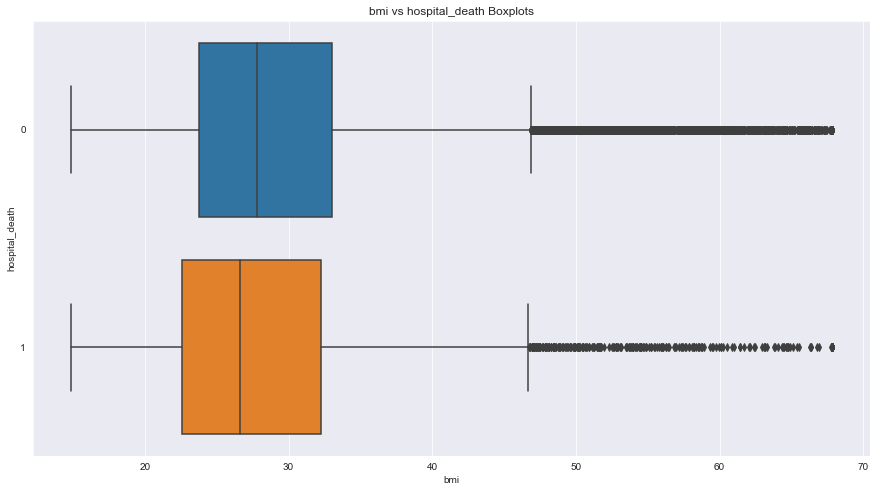

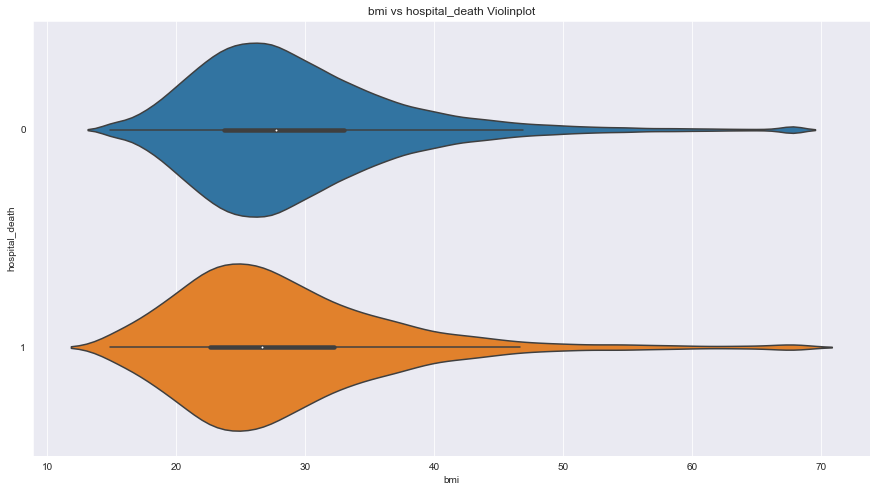

--------------------------------------------------------------------------------------------------------------------------


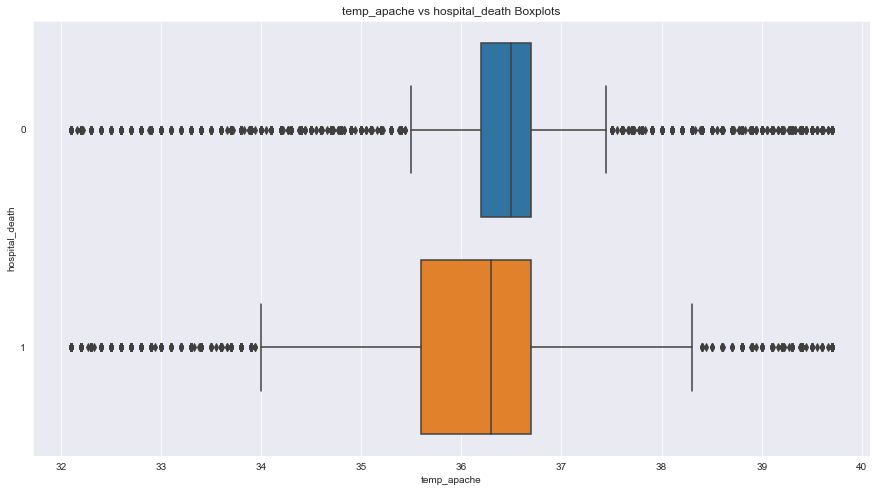

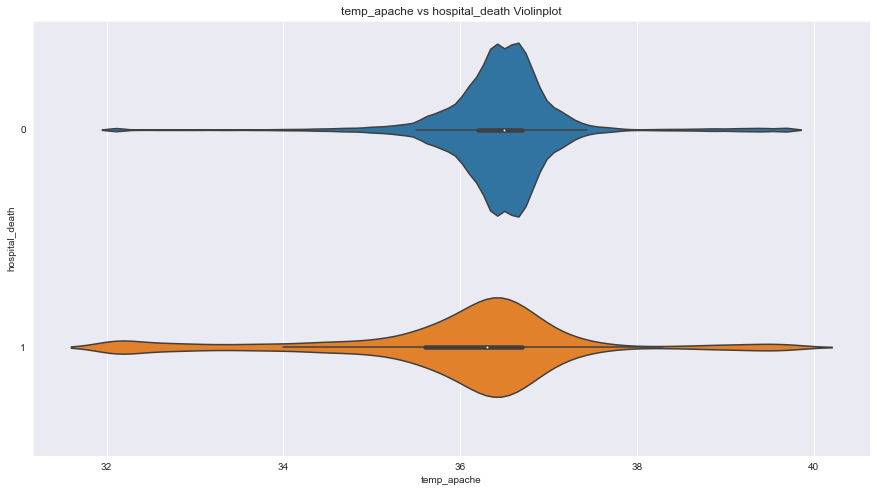

--------------------------------------------------------------------------------------------------------------------------


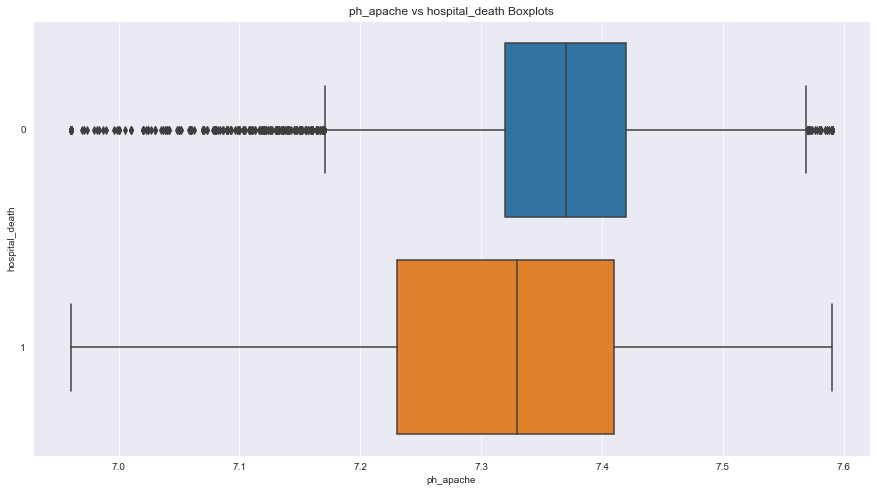

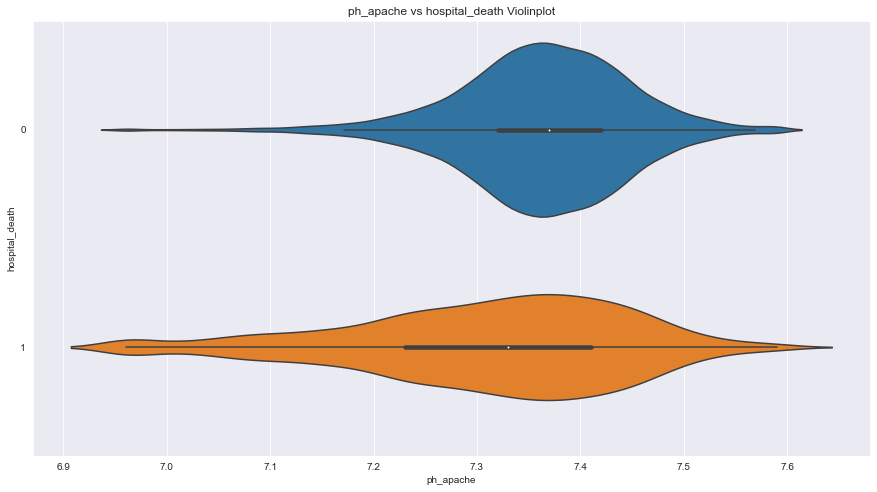

--------------------------------------------------------------------------------------------------------------------------


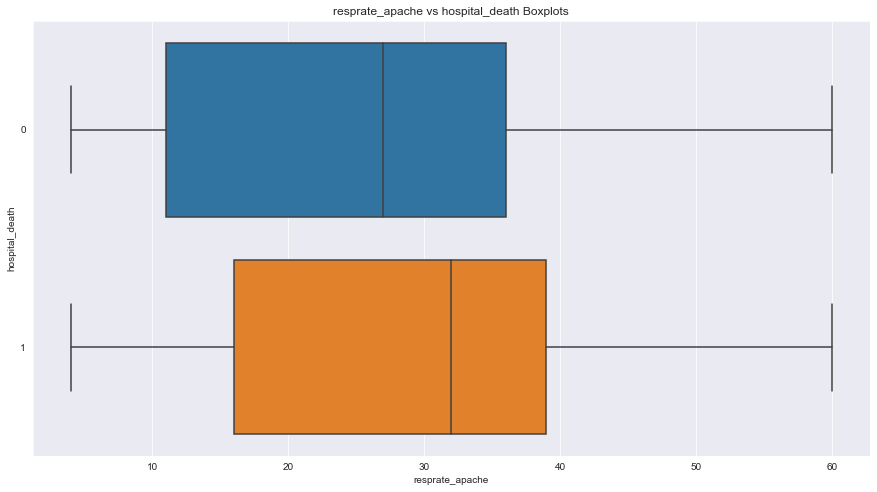

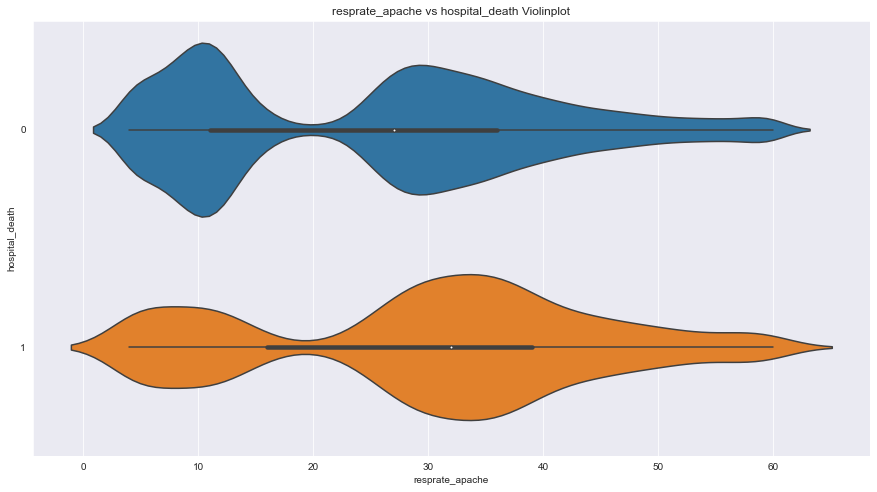

--------------------------------------------------------------------------------------------------------------------------


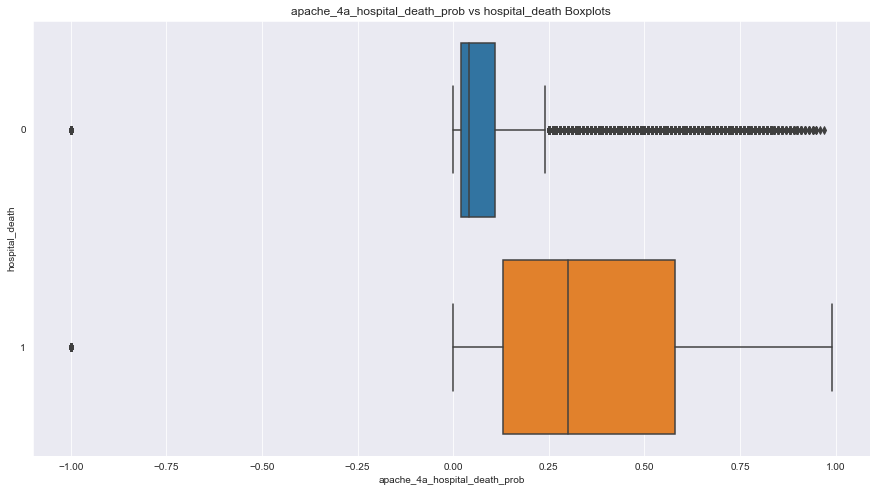

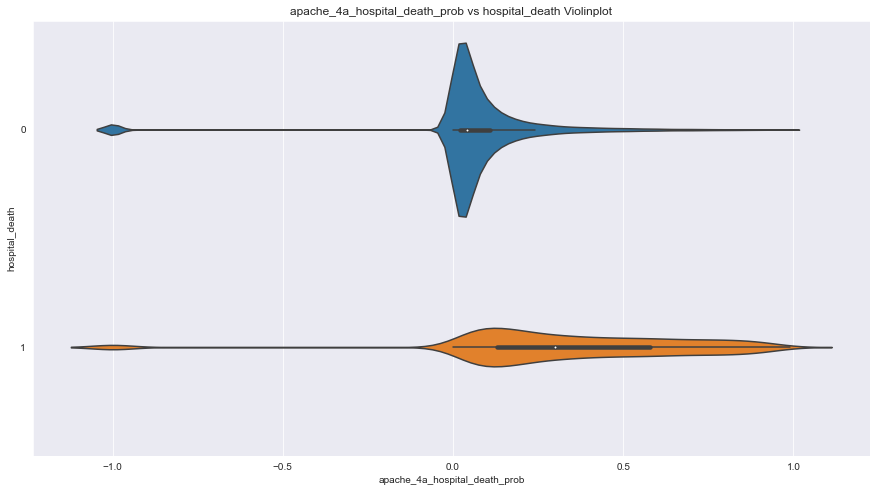

--------------------------------------------------------------------------------------------------------------------------


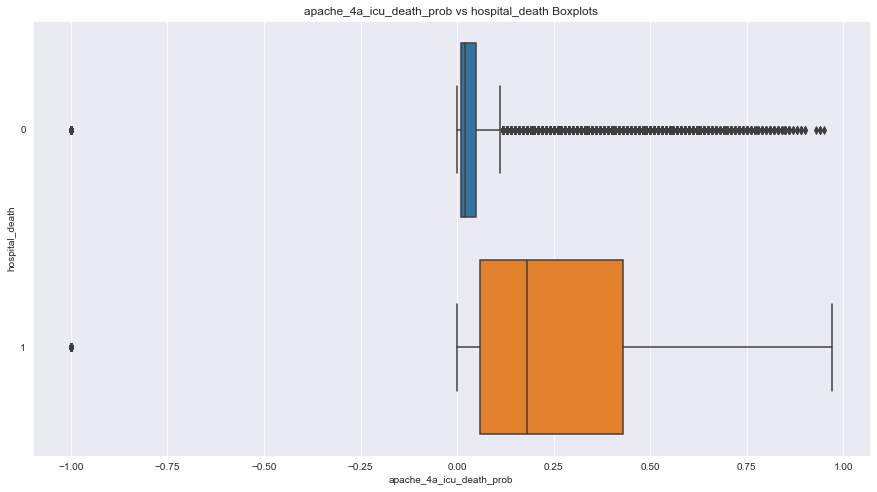

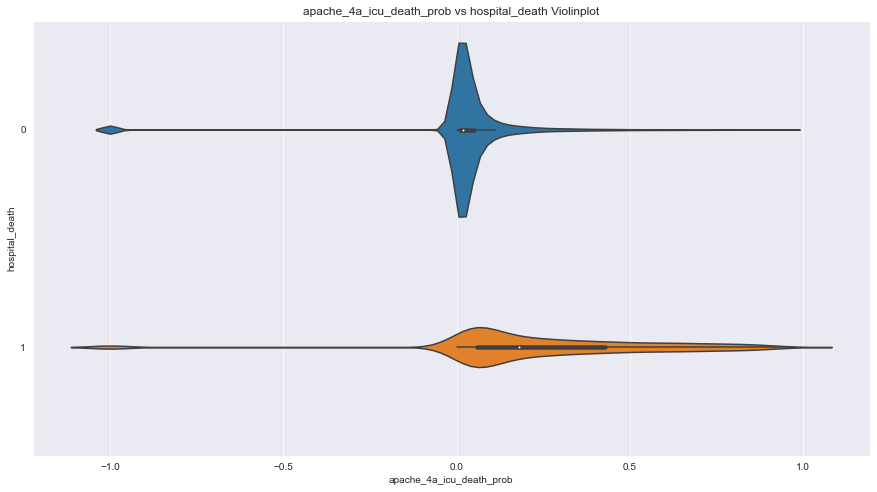

--------------------------------------------------------------------------------------------------------------------------


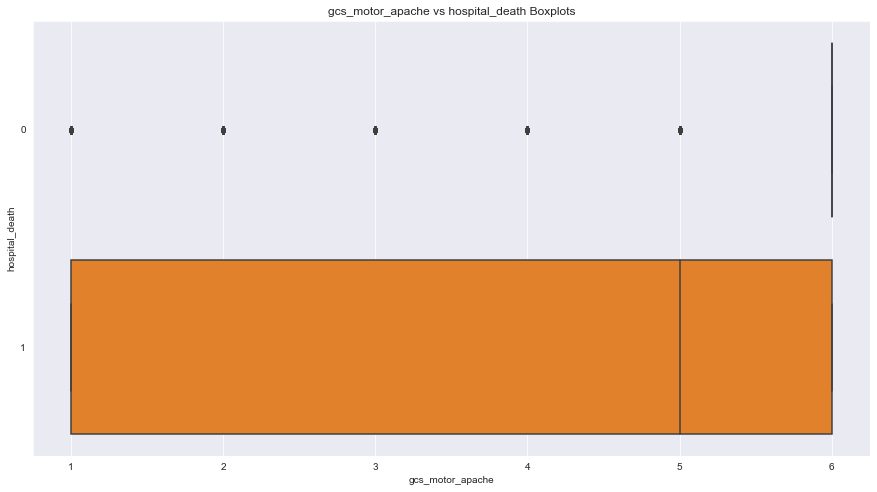

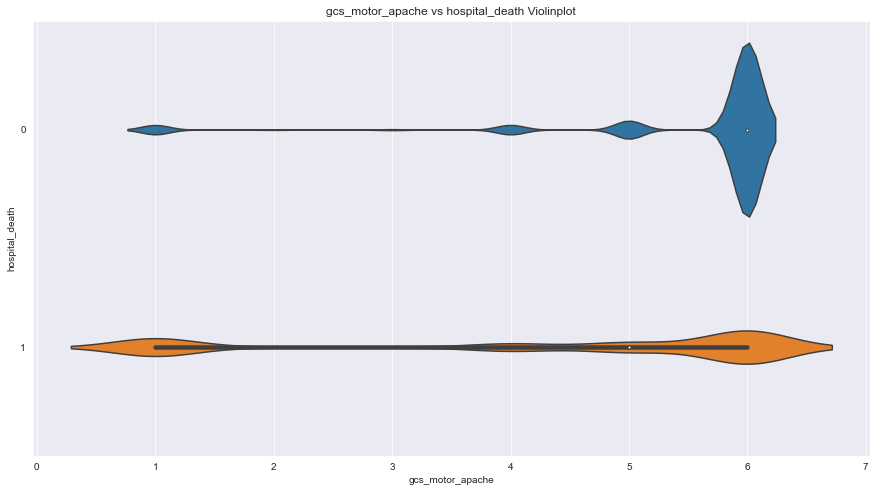

--------------------------------------------------------------------------------------------------------------------------


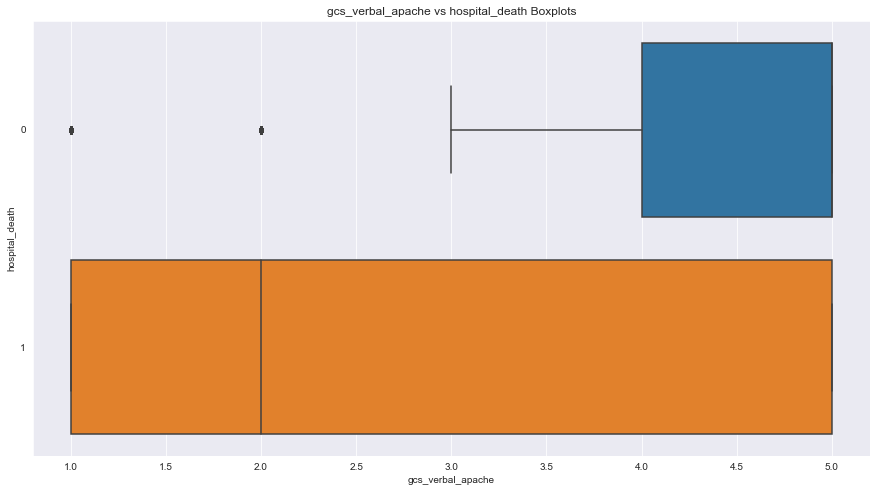

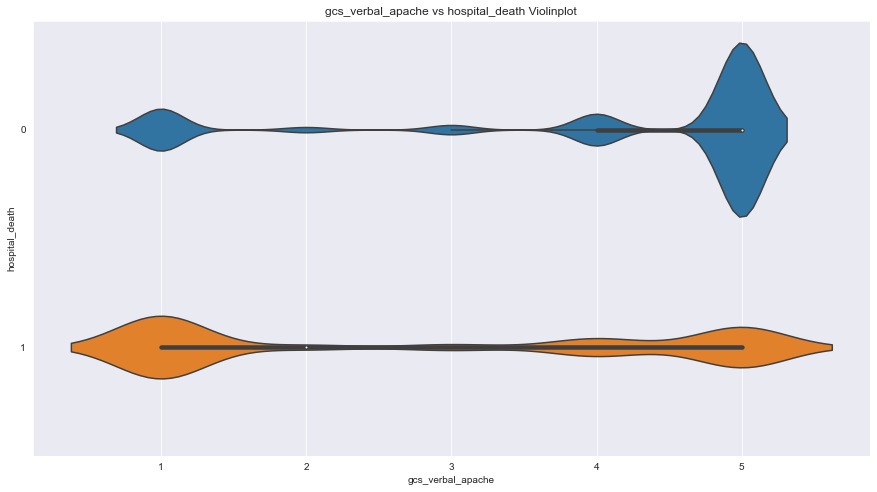

--------------------------------------------------------------------------------------------------------------------------


In [233]:
cols = ['age', 'height', 'weight', 'bmi','temp_apache','ph_apache',
       'resprate_apache', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
       'gcs_motor_apache', 'gcs_verbal_apache']

for col in cols:
    plot_boxplot_violin(df_train, col)



acá comentario de los gráficos anteriores (falta)

Veamos la correlación de todas las variables continuas hacia la variable objetivo hospital_death 

In [251]:
corr_to_target = df_train.corrwith(df_train['hospital_death']).sort_values()
corr_to_target.head(60)

gcs_motor_apache            -0.270735
gcs_eyes_apache             -0.248611
gcs_verbal_apache           -0.229512
d1_sysbp_invasive_min       -0.227256
d1_arterial_ph_min          -0.226278
h1_albumin_min              -0.215500
h1_albumin_max              -0.214971
d1_mbp_invasive_min         -0.213562
ph_apache                   -0.203358
h1_arterial_ph_max          -0.202477
d1_spo2_min                 -0.201555
d1_sysbp_min                -0.198414
d1_sysbp_noninvasive_min    -0.198341
d1_temp_min                 -0.198142
h1_arterial_ph_min          -0.193873
d1_albumin_min              -0.191161
d1_mbp_noninvasive_min      -0.184080
d1_mbp_min                  -0.183846
albumin_apache              -0.183129
d1_diasbp_noninvasive_min   -0.169032
d1_diasbp_min               -0.168735
d1_diasbp_invasive_min      -0.168543
d1_albumin_max              -0.164537
d1_hco3_min                 -0.156687
temp_apache                 -0.150303
h1_sysbp_noninvasive_min    -0.141342
h1_mbp_nonin

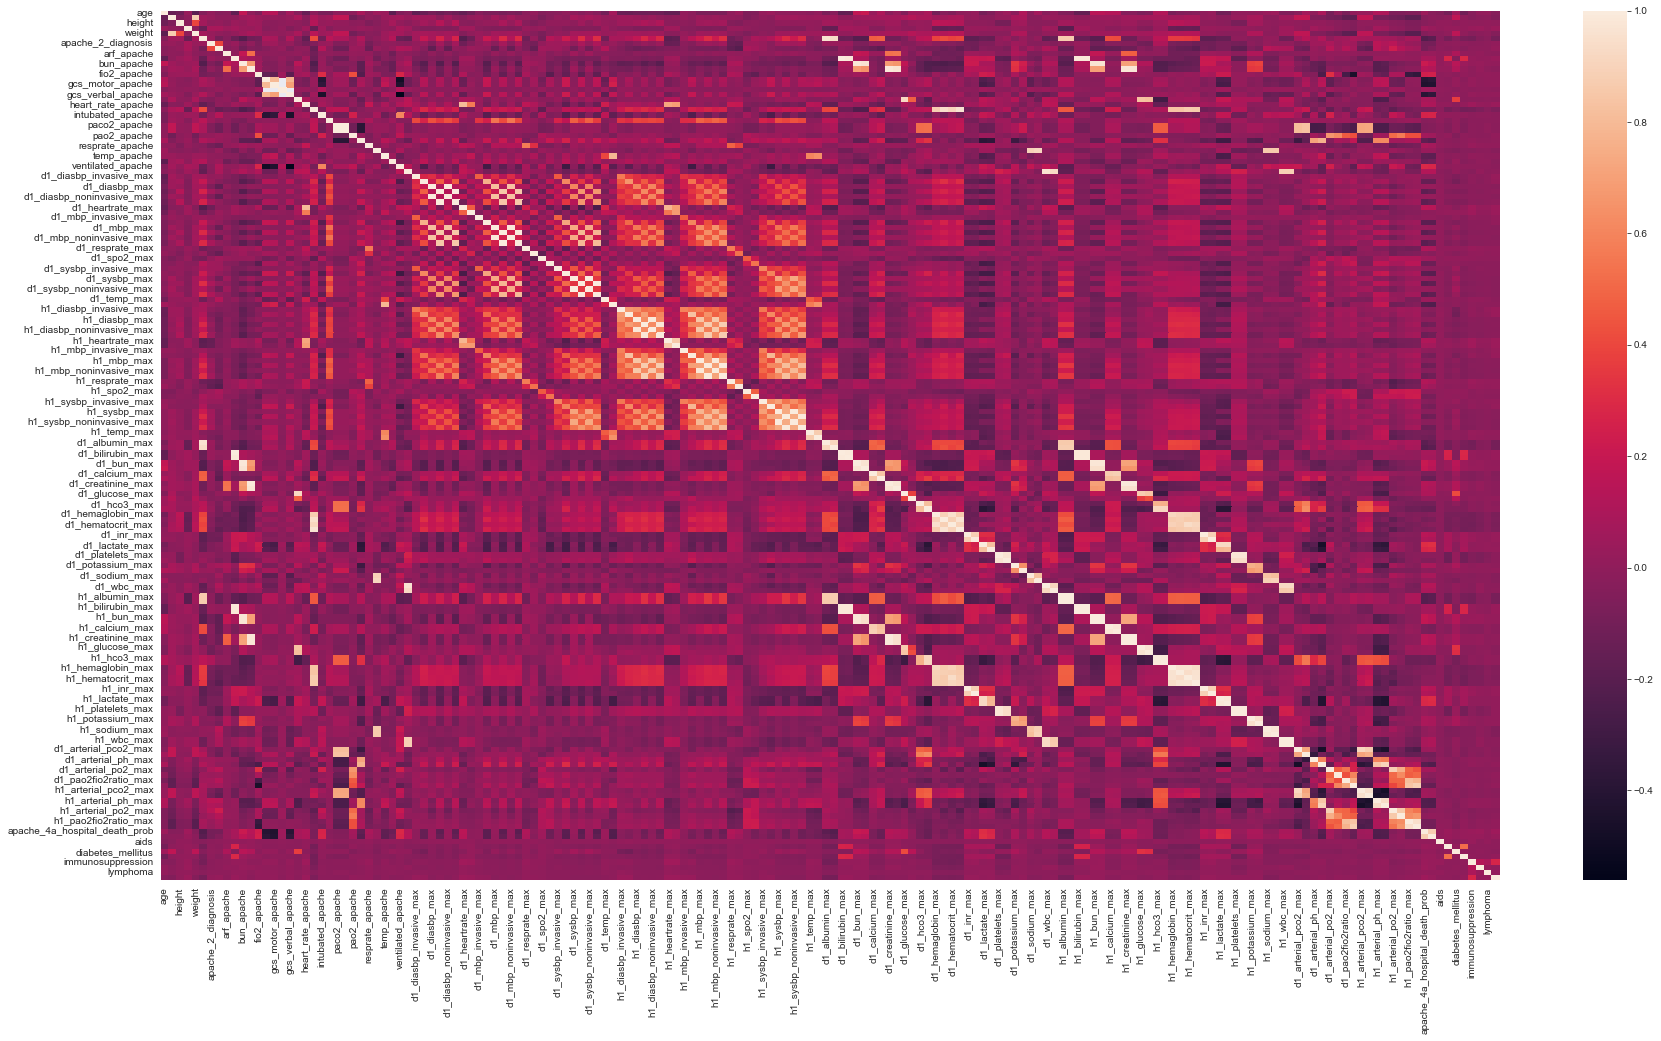

In [238]:
plt.figure(figsize=(30,16))
sns.heatmap(df_train[float_columns].corr());

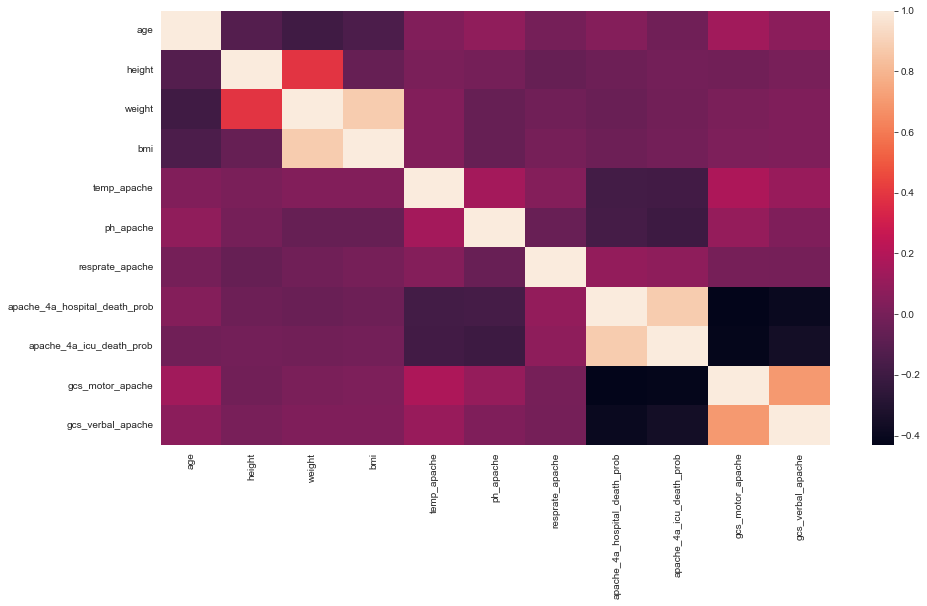

In [236]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train[cols].corr());